<a href="https://colab.research.google.com/github/mayorofdata/Revenue-Prediction/blob/master/Copy_of_Revenue_Prediction_Using_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revenue Prediction Using Simple Linear Regression
## Problem Statement
### An ice cream business will like to predict the daily revenue generated in dollars based on the outside air temperature(degC). In this project, I applied Linear Regression model to solve the task.

### Dataset is obtained from Kaggle - https://www.kaggle.com/ahmednour/ice-cream-dataset
### In the dataset, there are two fields - 
### - Independent variable X: Outside Air Temperature in degree Celsius and 
### - Dependent variable Y: Overall daily revenue generated in dollars. 

### Step #1: Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step #2: Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
IceCream = pd.read_csv("/content/drive/My Drive/DATA-475/IceCreamData.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
IceCream.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
IceCream.tail(5)

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
IceCream

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [6]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### Step #3: Visualize Dataset

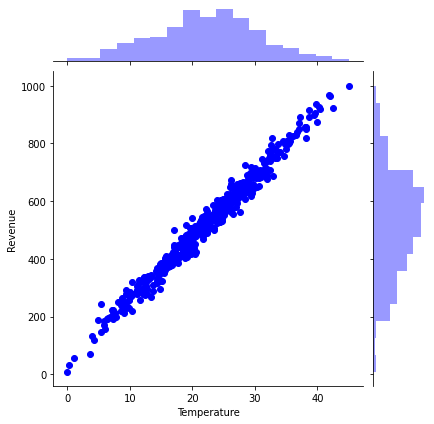

In [8]:
sns.jointplot( x= 'Temperature', y='Revenue', data = IceCream, color = 'blue')

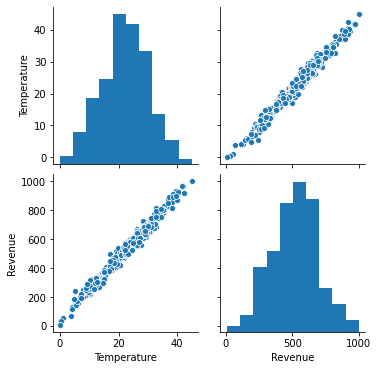

In [9]:
sns.pairplot(IceCream)

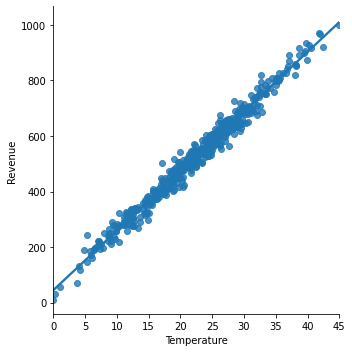

In [10]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

### Step #4: Create Testing and Training Dataset

In [11]:
X = IceCream[['Temperature']]
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [12]:
Y = IceCream[['Revenue']]
Y

,Revenue
0,534.799028
1,625.190122
2,660.632289
3,487.706960
4,316.240194
...,...
495,524.746364
496,755.818399
497,306.090719
498,566.217304


In [13]:
y = IceCream['Revenue']
y

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,Temperature
249,18.148952
433,8.756004
19,21.775948
322,18.439982
332,15.843022
...,...
106,23.761436
270,24.628611
348,38.185199
435,15.916678


In [17]:
X_test

,Temperature
361,29.704183
73,27.375401
374,23.984641
155,21.144047
104,26.595054
...,...
347,24.960446
86,27.780500
75,28.790102
438,17.132795


In [18]:
X_train.shape

(400, 1)

In [19]:
X_test.shape

(100, 1)

In [20]:
y_train.shape

(400,)

In [21]:
y_test.shape

(100,)

### Step #5: Train the model

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print('Linear Model Coefficeint (m)', regressor.coef_)
print('Linear Model Coefficeint (b)', regressor.intercept_)

Linear Model Coefficeint (m) [21.38197386]
Linear Model Coefficeint (b) 46.80464127742374


### Step #6: Test the model

In [24]:
X_test.shape

(100, 1)

In [25]:
y_predict = regressor.predict(X_test)

In [26]:
y_predict

array([681.93870622, 632.14474995, 559.64360486, 498.90609993,
       615.45939165, 304.72417213, 285.79420948, 315.60842003,
       506.26427154, 685.69744019, 723.96030494, 400.84625166,
       431.61634142, 671.36600031,  52.51422053, 198.77682819,
       523.08595488, 563.90495549, 583.83579144, 682.24517768,
       556.2285085 , 783.88766163, 655.44109362, 570.0735459 ,
       912.21841974, 664.74778505, 315.96428407, 631.00983241,
       731.1169322 , 698.02984963, 435.08453949, 471.22058847,
       710.29440571, 799.81874771, 641.02153776, 493.66044553,
       744.9247237 , 318.10831232, 262.69083171, 132.04437543,
       582.55738268, 230.41054193, 547.29799783, 393.00654153,
       436.66704225, 593.02780835, 572.09312165, 125.16251036,
       474.79444877, 530.45025905, 623.19251713, 503.4813544 ,
       484.60103791, 498.58705266, 551.22738648, 630.80646076,
       573.12703075, 679.486141  , 171.29759926, 660.49458416,
       583.75017395, 704.57274239, 535.82240023, 630.12

In [27]:
y_test

361    659.873287
73     623.248701
374    559.135869
155    497.752318
104    627.901841
          ...    
347    564.310532
86     643.944327
75     653.986736
438    412.082357
15     469.909033
Name: Revenue, Length: 100, dtype: float64

Text(0.5, 1.0, 'Revenue vs Temperature at Ice Cream Stand (Training set)')

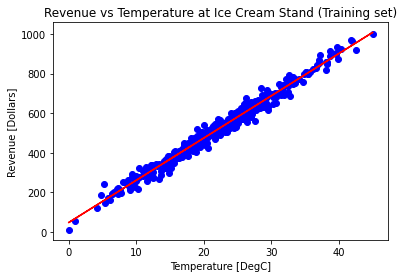

In [28]:
plt.scatter(X_train,y_train, color="blue")
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.xlabel("Temperature [DegC]")
plt.ylabel("Revenue [Dollars]")
plt.title("Revenue vs Temperature at Ice Cream Stand (Training set)")

Text(0.5, 1.0, 'Revenue vs Temperature at Ice Cream Stand (Testing set)')

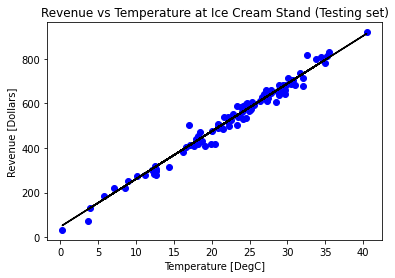

In [29]:
plt.scatter(X_test,y_test, color="blue")
plt.plot(X_test, regressor.predict(X_test), color = 'black')
plt.xlabel("Temperature [DegC]")
plt.ylabel("Revenue [Dollars]")
plt.title("Revenue vs Temperature at Ice Cream Stand (Testing set)")

In [30]:
# Predict the revenue in dollars that will be generated when the temperature is 40 degC
T = np.array([40]).reshape(1, 1)
revenue = regressor.predict(T)
revenue

array([902.08359549])

In [31]:
# Predict the revenue in dollars that will be generated when the temperature is 10 degC
T = np.array([10]).reshape(1, 1)
revenue = regressor.predict(T)
revenue

array([260.62437983])

In [32]:
# Predict the revenue in dollars that will be generated when the temperature is 25 degC
T = np.array([25]).reshape(1, 1)
revenue = regressor.predict(T)
revenue

array([581.35398766])